In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [39]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
Training_data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
Testing_data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

In [3]:
Training_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X_train = Training_data.drop(['label'], axis=1)
Y_train = Training_data.loc[:,'label']
X_test = Testing_data.drop(['label'], axis=1)
Y_test = Testing_data.loc[:,'label']
# y=y.numpy()

In [5]:
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

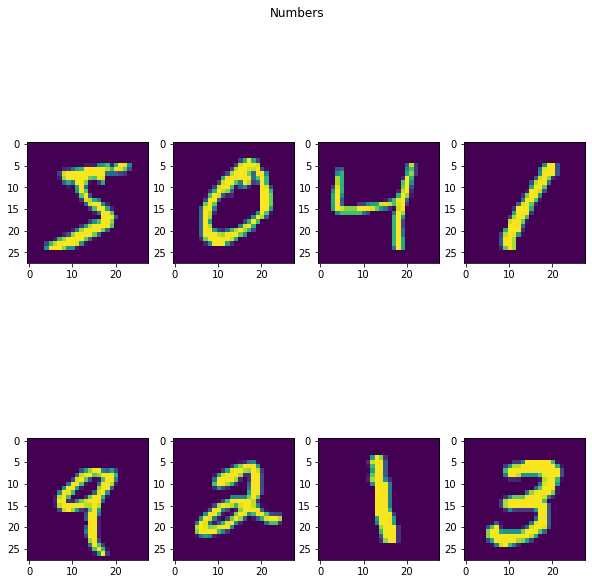

In [42]:
import matplotlib.pyplot as plt 
x=0
pics = 10 #set the number of pics
fig,ax = plt.subplots(int(pics//4),4,figsize=(10,10))
plt.suptitle('Numbers')
ax = ax.ravel()
for i in range((pics//4)*4):
    arr=X_train.iloc[x].values
    arr=arr.reshape(28,28)
    ax[i].imshow(arr)
    x+=1   

In [10]:
Y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [11]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x=Y_train)
fig.update_layout(bargap=0.2)
fig.show()

In [12]:
fig = px.pie(Y_train, values=Y_train.value_counts().values, names=Y_train.value_counts().index)
fig.update_traces(hoverinfo='label+percent', textinfo='value')
fig.show()


In [13]:
x_train= X_train/255.0
x_test = X_test/255.0
x_train = X_train.values.reshape(-1,28,28,1)
x_test = X_test.values.reshape(-1,28,28,1)

In [45]:
x_train1= X_train/255.0
x_test1 = X_test/255.0
x_train1 = x_train1.values.reshape(-1,28,28,1)
x_test1 = x_test1.values.reshape(-1,28,28,1)

In [43]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(Y_train.values, num_classes = 10)
y_test= to_categorical(Y_test.values, num_classes = 10)

In [47]:
x_train1.shape, y_train.shape, x_test1.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [ ]:
y_train[27][0]

In [48]:
datagen=ImageDataGenerator(shear_range=0.3,
                   horizontal_flip=True,
                   zoom_range=0.3)

In [49]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.0001)


In [50]:
model = Sequential()

model.add(Conv2D(32, 
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(28,28,1),
                 padding='same', 
                 strides=1, 
                 kernel_initializer='he_normal',
                ))
model.add(MaxPool2D(pool_size=(2,2),
                    strides=2,
                    padding='same'))

model.add(Dropout(0.25))

model.add(Conv2D(64,
                 kernel_size=(3,3),
                 activation='relu',
                 strides=1,
                 padding='same'))
model.add(MaxPool2D(pool_size=(2,2),
                    strides=2,
                    padding='same'))
model.add(Dropout(0.40))

model.add(Conv2D(128,
                 kernel_size=(3,3),
                 activation='relu',
                 strides=1,
                 padding='same'))

model.add(MaxPool2D(pool_size=(2,2),
                    strides=2,
                    padding='same'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2022-11-07 06:07:34.335611: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [53]:
history = model.fit(datagen.flow(x_train1,y_train),batch_size=120,epochs=10,validation_data=(x_test1,y_test),callbacks=learning_rate_reduction)

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2556 - accuracy: 0.9196 - val_loss: 0.0593 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1663 - accuracy: 0.9482 - val_loss: 0.0479 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1391 - accuracy: 0.9566 - val_loss: 0.0446 - val_accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1235 - accuracy: 0.9618 - val_loss: 0.0474 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1154 - accuracy: 0.9644 - val_loss: 0.0387 - val_accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1103 - accuracy: 0.9660 - val_loss: 0.0384 - val_accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1032 - accuracy: 0.9686 - val_loss: 0.0413 -

In [ ]:
print('Accurucy of the model:',model.evaluate(x_test,y_test)[1]*100)

In [ ]:
epochs = [i for i in range(30)]

fig,ax= plt.subplots(1,2)
train_acc= history.history['accuracy']
train_loss= history.history['loss']
vall_acc= history.history['val_accuracy']
vall_loss=history.history['val_loss']
fig.set_size_inches(10,10)

ax[0].plot(epochs, train_acc, 'go-', label='Train Acc')
ax[0].plot(epochs, vall_acc, 'ro-', label= 'Test Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, train_loss, 'go-', label='Train Loss')
ax[1].plot(epochs, vall_loss, 'ro-', label= 'Test Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

In [14]:
import torch
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [15]:
batch_size = 32
keep_prob = 1


In [17]:
x_train = torch.tensor(x_train).type(torch.float32)
# y_train = torch.tensor(y_train).type(torch.float32)
x_test = torch.tensor(x_test).type(torch.float32)
# y_test = torch.tensor(y_test).type(torch.float32)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [31]:
x_test.shape

torch.Size([10000, 28, 28, 1])

In [19]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=1 - keep_prob))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=1 - keep_prob))
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
            torch.nn.Dropout(p=1 - keep_prob))
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight) # initialize parameters

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        out = self.fc2(out)
        return out

#instantiate CNN model
model = CNN()
model

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning:

nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.



CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (3): Dropout(p=0, inplace=False)
  )
  (fc1): Linear(in_features=2048, out_features=625, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=2048, out_features=625, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
  )
  (fc2): Linear(in_features=625, out_features=10, bias=True)
)

In [20]:
x_train.shape
x_train = x_train.reshape(60000,1,28,28)

In [22]:
total_batch = len(Training_data) // batch_size

In [23]:
X_list = [x_train[batch_size*y:batch_size*(y+1),:,:] for y in range(total_batch)]
X_list[0].dtype


torch.float32

In [24]:
Y_train1 = torch.tensor(Y_train)
y_list = [Y_train1[batch_size*y:batch_size*(y+1)] for y in range(total_batch)]
y_list[0]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])

In [25]:
y_list[0]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])

In [26]:
import torch
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [27]:
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

In [29]:
print('Training the Deep Learning network ...')
train_cost = []
train_accu = []

training_epochs = 15
total_batch = len(Training_data) // batch_size

print('Size of the training dataset is {}'.format(x_train.data.size()))
print('Size of the testing dataset'.format(x_train.data.size()))
print('Batch size is : {}'.format(batch_size))
print('Total number of batches is : {0:2.0f}'.format(total_batch))
print('\nTotal number of epochs is : {0:2.0f}'.format(training_epochs))

for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(total_batch):
        X = Variable(X_list[0])    # image is already size of (28x28), no reshape
        Y = Variable(y_list[0])    # label is not one-hot encoded

        optimizer.zero_grad() # <= initialization of the gradients
        
        # forward propagation
        hypothesis = model(X)
        cost = criterion(hypothesis, Y) # <= compute the loss function
        
        # Backward propagation
        cost.backward() # <= compute the gradient of the loss/cost function     
        optimizer.step() # <= Update the gradients
             
        # Print some performance to monitor the training
        prediction = hypothesis.data.max(dim=1)[1]
        train_accu.append(((prediction.data == Y.data).float().mean()).item())
        train_cost.append(cost.item())   
        if i % 200 == 0:
            print("Epoch= {},\t batch = {},\t cost = {:2.4f},\t accuracy = {}".format(epoch+1, i, train_cost[-1], train_accu[-1]))
       
        avg_cost += cost.data / total_batch

    print("[Epoch: {:>4}], averaged cost = {:>.9}".format(epoch + 1, avg_cost.item()))


print('Learning Finished!')

Training the Deep Learning network ...
Size of the training dataset is torch.Size([60000, 1, 28, 28])
Size of the testing dataset
Batch size is : 32
Total number of batches is : 1875

Total number of epochs is : 15
Epoch= 1,	 batch = 0,	 cost = 38.2730,	 accuracy = 0.15625
Epoch= 1,	 batch = 200,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 1,	 batch = 400,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 1,	 batch = 600,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 1,	 batch = 800,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 1,	 batch = 1000,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 1,	 batch = 1200,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 1,	 batch = 1400,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 1,	 batch = 1600,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 1,	 batch = 1800,	 cost = 0.0000,	 accuracy = 1.0
[Epoch:    1], averaged cost = 0.388551652
Epoch= 2,	 batch = 0,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 2,	 batch = 200,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 2,	 batch = 400,	 cost = 0.0000,	 accuracy = 1.0
Epoch= 2

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x7f3dd1c062d0>], (0.0, 100.0))

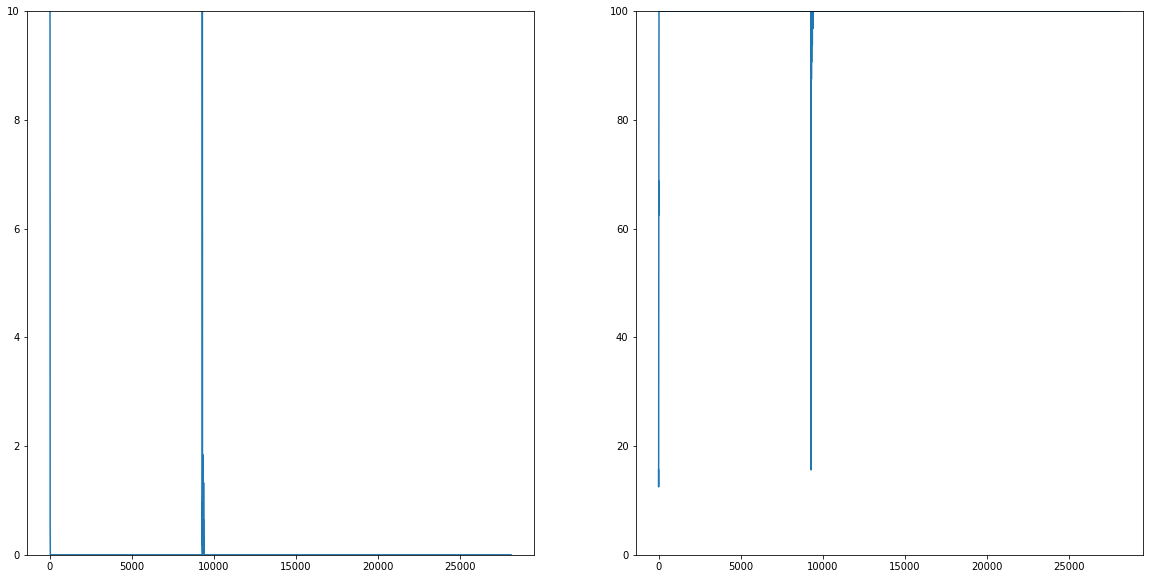

In [35]:
from matplotlib import pylab as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.subplot(121), plt.plot(np.arange(len(train_cost)), train_cost), plt.ylim([0,10])
plt.subplot(122), plt.plot(np.arange(len(train_accu)), 100 * torch.as_tensor(train_accu).numpy()), plt.ylim([0,100])

In [38]:
model.eval()    # set the model to evaluation mode (dropout=False)

X_test = Variable(x_test.reshape(10000,1,28,28))
# Y_test = Variable(mnist_test.targets)
Y_test = Variable(torch.tensor(Y_test))

prediction = model(x_test)

# Compute accuracy
correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y_test.data)
accuracy = correct_prediction.float().mean().item()
print('\nAccuracy: {:2.2f} %'.format(accuracy*100))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).




Accuracy: 45.43 %


In [33]:
x_test=x_test.reshape(10000,1,28,28)
x_test.shape

torch.Size([10000, 1, 28, 28])